# DETECTION DU CONTENU GENERER PAR L'IA

In [70]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ETOILE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Chargement des donnees 

In [72]:
def load_ai_data(path):
    df = pd.read_csv(path)
    print("\nAperçu des données :")
    print(df.head())
    print("\nRépartition des classes (IA vs Humain) :")
    print(df['generated'].value_counts())
    return df

# 2. Nettoyage de texte

In [74]:

def clean_text_ai(text):
    text = text.lower()
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

def preprocess_ai_data(df):
    df['clean_text'] = df['text'].apply(clean_text_ai)
    return df


# 3. Analyse Exploratoire

In [76]:

def plot_class_distribution_ai(df, label_column='generated'):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=label_column, data=df, order=df[label_column].value_counts().index)
    plt.title("Distribution des classes (Contenu IA vs Humain)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 4. Vectorisation

In [78]:

def vectorize_text_ai(method, X_train, X_test):
    if method == 'tfidf':
        vectorizer = TfidfVectorizer()
    else:
        vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    return X_train_vec, X_test_vec, vectorizer


# 5. Entrainement du Modele

In [88]:
def train_models_ai(X_train, y_train):
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)

    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    svm_model = SVC()
    svm_model.fit(X_train, y_train)

    return {
        "Logistic Regression": logistic_model,
        "Random Forest": rf_model,
        "SVM": svm_model
    }


# 6. Évaluation du modèle

In [90]:

def evaluate_models_ai(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        print(f"\n\n===== {name} =====")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_ if hasattr(model, 'classes_') else np.unique(y_test))
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Matrice de confusion - {name}")
        plt.show()


#  7. Pipeline global pour la détection de contenu IA

In [96]:
def full_pipeline_ai_detection(csv_path, method='tfidf'):
    df = load_ai_data(csv_path)
    df = preprocess_ai_data(df)
    df = df[['clean_text', 'generated']]
    plot_class_distribution_ai(df, label_column='generated')
    X = df['clean_text']
    y = df['generated']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    X_train_vec, X_test_vec, vectorizer = vectorize_text_ai(method, X_train, X_test)
    models = train_models_ai(X_train_vec, y_train)
    evaluate_models_ai(models, X_test_vec, y_test)
    joblib.dump(models["Logistic Regression"], "ai_text_detector_model.pkl")
    joblib.dump(vectorizer, "vectorizer.pkl")
    print(" ]Modèle et vectoriseur sauvegardés !")


# 8. Execution


Aperçu des données :
   prompt_id                                               text        id  \
0         21  Blue well ahead situation whose memory quite p...  8e274300   
1         37  One important aspect to consider about apply i...  34a3602d   
2         13  Event them form run among. Involve art remain ...  95919c04   
3          9  One important aspect to consider about large i...  1ae0f5d1   
4         31  A growing number of experts suggest that smile...  4d51f12c   

   generated  
0          0  
1          1  
2          0  
3          1  
4          1  

Répartition des classes (IA vs Humain) :
generated
1    10139
0     9861
Name: count, dtype: int64


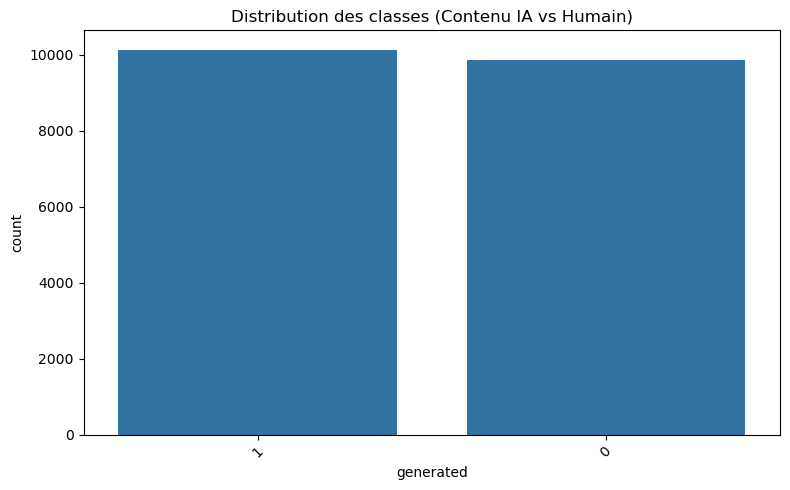



===== Logistic Regression =====
Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1972
           1       1.00      1.00      1.00      2028

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



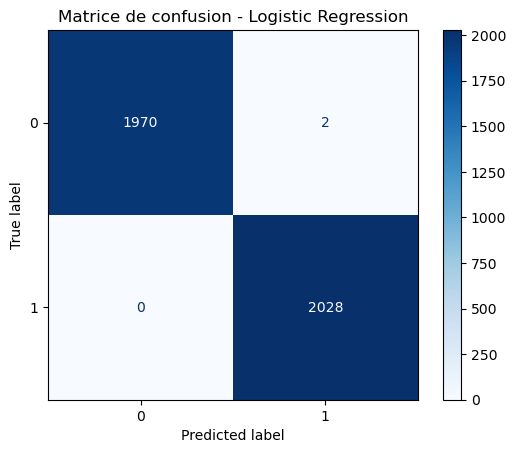



===== Random Forest =====
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1972
           1       1.00      1.00      1.00      2028

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



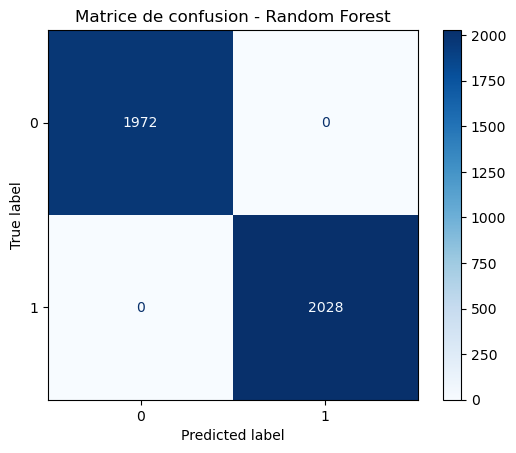



===== SVM =====
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1972
           1       1.00      1.00      1.00      2028

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



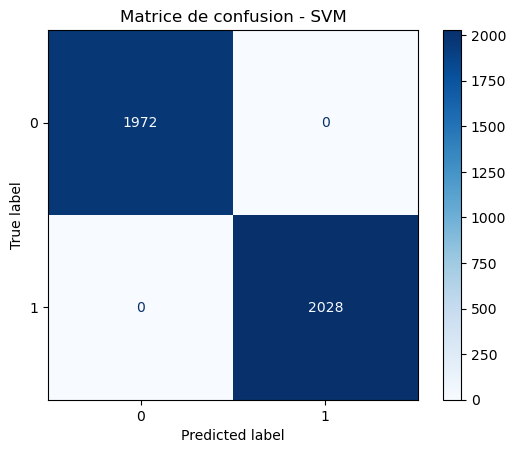

 ]Modèle et vectoriseur sauvegardés !


In [98]:
if __name__ == "__main__":
    csv_path = "D:\\final.csv"
    full_pipeline_ai_detection(csv_path, method='tfidf')
